In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hocmay/behavioral_risk_factor_data_heart_disease_stroke_prevention.csv


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Đọc dữ liệu

In [17]:
data= pd.read_csv('/kaggle/input/hocmay/behavioral_risk_factor_data_heart_disease_stroke_prevention.csv')

/tmp/ipykernel_33/2771526640.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data= pd.read_csv('/kaggle/input/hocmay/behavioral_risk_factor_data_heart_disease_stroke_prevention.csv')


In [18]:
data

,year,locationabbr,locationdesc,datasource,priorityarea1,priorityarea2,priorityarea3,priorityarea4,category,topic,...,data_value_footnote,confidence_limit_low,confidence_limit_high,categoryid,topicid,indicatorid,breakoutcategoryid,breakoutid,locationid,geolocation
0,2011,NV,Nevada,BRFSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Coronary Heart Disease,...,Statistically unstable estimates not presented...,NaN,NaN,1,T4,BR001,BOC03,AGE04,32.0,POINT(-117.07184056399967 39.493240390000494)
1,2011,NV,Nevada,BRFSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Coronary Heart Disease,...,Statistically unstable estimates not presented...,NaN,NaN,1,T4,BR001,BOC04,RAC02,32.0,POINT(-117.07184056399967 39.493240390000494)
2,2011,NV,Nevada,BRFSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Coronary Heart Disease,...,Statistically unstable estimates not presented...,NaN,NaN,1,T4,BR001,BOC03,AGE01,32.0,POINT(-117.07184056399967 39.493240390000494)
3,2011,NV,Nevada,BRFSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Coronary Heart Disease,...,Statistically unstable estimates not presented...,NaN,NaN,1,T4,BR001,BOC04,RAC07,32.0,POINT(-117.07184056399967 39.493240390000494)
4,2011,NV,Nevada,BRFSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Coronary Heart Disease,...,Statistically unstable estimates not presented...,NaN,NaN,1,T4,BR001,BOC04,RAC04,32.0,POINT(-117.07184056399967 39.493240390000494)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34999,2011,NH,New Hampshire,BRFSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Coronary Heart Disease,...,Statistically unstable estimates not presented...,NaN,NaN,1,T4,BR001,BOC03,AGE04,33.0,POINT(-71.50036091999965 43.65595011300047)
35000,2011,NH,New Hampshire,BRFSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Coronary Heart Disease,...,Statistically unstable estimates not presented...,NaN,NaN,1,T4,BR001,BOC04,RAC07,33.0,POINT(-71.50036091999965 43.65595011300047)
35001,2011,NJ,New Jersey,BRFSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Coronary Heart Disease,...,Statistically unstable estimates not presented...,NaN,NaN,1,T4,BR001,BOC03,AGE01,34.0,POINT(-74.27369128799967 40.13057004800049)
35002,2011,NM,New Mexico,BRFSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Coronary Heart Disease,...,Statistically unstable estimates not presented...,NaN,NaN,1,T4,BR001,BOC03,AGE01,35.0,POINT(-106.24058098499967 34.52088095200048)


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35004 entries, 0 to 35003
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        35004 non-null  int64  
 1   locationabbr                35004 non-null  object 
 2   locationdesc                35004 non-null  object 
 3   datasource                  35004 non-null  object 
 4   priorityarea1               2704 non-null   object 
 5   priorityarea2               0 non-null      float64
 6   priorityarea3               11938 non-null  object 
 7   priorityarea4               0 non-null      float64
 8   category                    35004 non-null  object 
 9   topic                       35004 non-null  object 
 10  indicator                   35004 non-null  object 
 11  break_out_category          35004 non-null  object 
 12  break_out                   35004 non-null  object 
 13  data_value_type             350

In [20]:
data.columns

Index(['year', 'locationabbr', 'locationdesc', 'datasource', 'priorityarea1',
       'priorityarea2', 'priorityarea3', 'priorityarea4', 'category', 'topic',
       'indicator', 'break_out_category', 'break_out', 'data_value_type',
       'data_value_unit', 'data_value', 'data_value_footnote_symbol',
       'data_value_footnote', 'confidence_limit_low', 'confidence_limit_high',
       'categoryid', 'topicid', 'indicatorid', 'breakoutcategoryid',
       'breakoutid', 'locationid', 'geolocation'],
      dtype='object')

# 2. Tiền xử lý dữ liệu

In [21]:
data.isnull().sum() #kiểm tra rỗng

year                              0
locationabbr                      0
locationdesc                      0
datasource                        0
priorityarea1                 32300
priorityarea2                 35004
priorityarea3                 23066
priorityarea4                 35004
category                          0
topic                             0
indicator                         0
break_out_category                0
break_out                         0
data_value_type                   0
data_value_unit                   0
data_value                     3154
data_value_footnote_symbol    31850
data_value_footnote           31850
confidence_limit_low           3522
confidence_limit_high          3522
categoryid                        0
topicid                           0
indicatorid                       0
breakoutcategoryid                0
breakoutid                        0
locationid                        0
geolocation                     706
dtype: int64

In [22]:
data1 = data.drop(columns=['datasource', 'priorityarea1','priorityarea2', 'priorityarea3', 'priorityarea4', 'data_value_type', 'data_value_unit'])

In [23]:
data1.duplicated().sum() # kiểm tra dữ liệu lặp

0

In [24]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [25]:
encoders = preprocessing.OrdinalEncoder()
ob_columns = data1.select_dtypes(include=['O','bool']).columns
data1[ob_columns] = encoders.fit_transform(data1[ob_columns])
data1.head()

,year,locationabbr,locationdesc,category,topic,indicator,break_out_category,break_out,data_value,data_value_footnote_symbol,data_value_footnote,confidence_limit_low,confidence_limit_high,categoryid,topicid,indicatorid,breakoutcategoryid,breakoutid,locationid,geolocation
0,2011,33.0,28.0,0.0,2.0,10.0,0.0,2.0,NaN,1.0,1.0,NaN,NaN,1,7.0,0.0,2.0,2.0,32.0,9.0
1,2011,33.0,28.0,0.0,2.0,10.0,3.0,11.0,NaN,1.0,1.0,NaN,NaN,1,7.0,0.0,3.0,11.0,32.0,9.0
2,2011,33.0,28.0,0.0,2.0,10.0,0.0,0.0,NaN,1.0,1.0,NaN,NaN,1,7.0,0.0,2.0,0.0,32.0,9.0
3,2011,33.0,28.0,0.0,2.0,10.0,3.0,13.0,NaN,1.0,1.0,NaN,NaN,1,7.0,0.0,3.0,14.0,32.0,9.0
4,2011,33.0,28.0,0.0,2.0,10.0,3.0,8.0,NaN,1.0,1.0,NaN,NaN,1,7.0,0.0,3.0,13.0,32.0,9.0


In [26]:
data1['data_value'].fillna(data1['data_value'].mean(), inplace = True)
data1['confidence_limit_low'].fillna(data1['confidence_limit_low'].mean(), inplace = True)
data1['confidence_limit_high'].fillna(data1['confidence_limit_high'].mean(), inplace = True)
data1['geolocation'].fillna(data1['geolocation'].mean(), inplace = True)

/tmp/ipykernel_33/3754684191.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1['data_value'].fillna(data1['data_value'].mean(), inplace = True)
/tmp/ipykernel_33/3754684191.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [27]:
data1

,year,locationabbr,locationdesc,category,topic,indicator,break_out_category,break_out,data_value,data_value_footnote_symbol,data_value_footnote,confidence_limit_low,confidence_limit_high,categoryid,topicid,indicatorid,breakoutcategoryid,breakoutid,locationid,geolocation
0,2011,33.0,28.0,0.0,2.0,10.0,0.0,2.0,36.370628,1.0,1.0,32.607573,40.178076,1,7.0,0.0,2.0,2.0,32.0,9.0
1,2011,33.0,28.0,0.0,2.0,10.0,3.0,11.0,36.370628,1.0,1.0,32.607573,40.178076,1,7.0,0.0,3.0,11.0,32.0,9.0
2,2011,33.0,28.0,0.0,2.0,10.0,0.0,0.0,36.370628,1.0,1.0,32.607573,40.178076,1,7.0,0.0,2.0,0.0,32.0,9.0
3,2011,33.0,28.0,0.0,2.0,10.0,3.0,13.0,36.370628,1.0,1.0,32.607573,40.178076,1,7.0,0.0,3.0,14.0,32.0,9.0
4,2011,33.0,28.0,0.0,2.0,10.0,3.0,8.0,36.370628,1.0,1.0,32.607573,40.178076,1,7.0,0.0,3.0,13.0,32.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34999,2011,30.0,29.0,0.0,2.0,10.0,0.0,2.0,36.370628,1.0,1.0,32.607573,40.178076,1,7.0,0.0,2.0,2.0,33.0,16.0
35000,2011,30.0,29.0,0.0,2.0,10.0,3.0,13.0,36.370628,1.0,1.0,32.607573,40.178076,1,7.0,0.0,3.0,14.0,33.0,16.0
35001,2011,31.0,30.0,0.0,2.0,10.0,0.0,0.0,36.370628,1.0,1.0,32.607573,40.178076,1,7.0,0.0,2.0,0.0,34.0,21.0
35002,2011,32.0,31.0,0.0,2.0,10.0,0.0,0.0,36.370628,1.0,1.0,32.607573,40.178076,1,7.0,0.0,2.0,0.0,35.0,3.0


In [28]:
correlation_matrix = data1.corr()

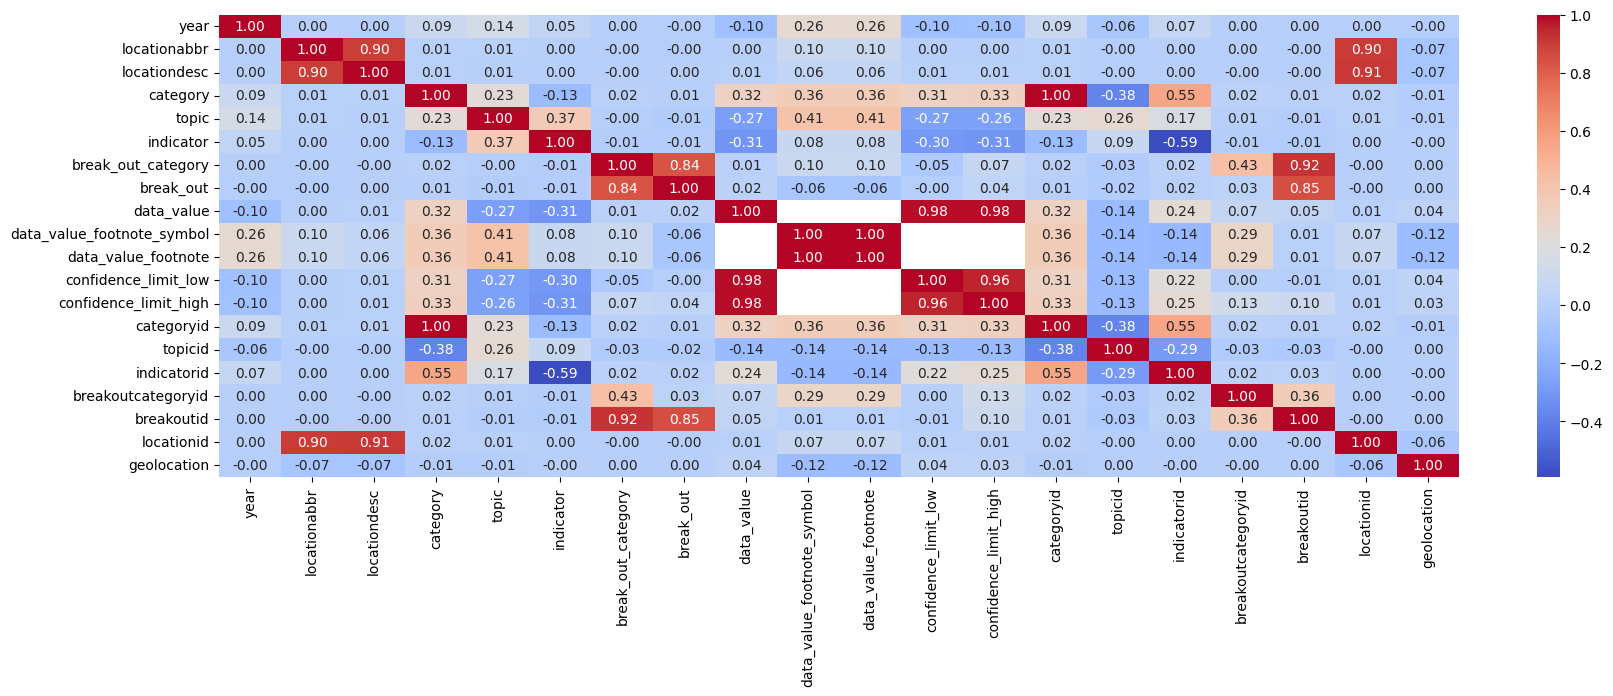

In [32]:
plt.figure(figsize=(20, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [33]:
data1

,year,locationabbr,locationdesc,category,topic,indicator,break_out_category,break_out,data_value,data_value_footnote_symbol,data_value_footnote,confidence_limit_low,confidence_limit_high,categoryid,topicid,indicatorid,breakoutcategoryid,breakoutid,locationid,geolocation
0,2011,33.0,28.0,0.0,2.0,10.0,0.0,2.0,36.370628,1.0,1.0,32.607573,40.178076,1,7.0,0.0,2.0,2.0,32.0,9.0
1,2011,33.0,28.0,0.0,2.0,10.0,3.0,11.0,36.370628,1.0,1.0,32.607573,40.178076,1,7.0,0.0,3.0,11.0,32.0,9.0
2,2011,33.0,28.0,0.0,2.0,10.0,0.0,0.0,36.370628,1.0,1.0,32.607573,40.178076,1,7.0,0.0,2.0,0.0,32.0,9.0
3,2011,33.0,28.0,0.0,2.0,10.0,3.0,13.0,36.370628,1.0,1.0,32.607573,40.178076,1,7.0,0.0,3.0,14.0,32.0,9.0
4,2011,33.0,28.0,0.0,2.0,10.0,3.0,8.0,36.370628,1.0,1.0,32.607573,40.178076,1,7.0,0.0,3.0,13.0,32.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34999,2011,30.0,29.0,0.0,2.0,10.0,0.0,2.0,36.370628,1.0,1.0,32.607573,40.178076,1,7.0,0.0,2.0,2.0,33.0,16.0
35000,2011,30.0,29.0,0.0,2.0,10.0,3.0,13.0,36.370628,1.0,1.0,32.607573,40.178076,1,7.0,0.0,3.0,14.0,33.0,16.0
35001,2011,31.0,30.0,0.0,2.0,10.0,0.0,0.0,36.370628,1.0,1.0,32.607573,40.178076,1,7.0,0.0,2.0,0.0,34.0,21.0
35002,2011,32.0,31.0,0.0,2.0,10.0,0.0,0.0,36.370628,1.0,1.0,32.607573,40.178076,1,7.0,0.0,2.0,0.0,35.0,3.0


In [34]:
data1 =data1[['year', 'category', 'topic', 'indicator', 'data_value','confidence_limit_low','confidence_limit_high']]


In [35]:
data1

,year,category,topic,indicator,data_value,confidence_limit_low,confidence_limit_high
0,2011,0.0,2.0,10.0,36.370628,32.607573,40.178076
1,2011,0.0,2.0,10.0,36.370628,32.607573,40.178076
2,2011,0.0,2.0,10.0,36.370628,32.607573,40.178076
3,2011,0.0,2.0,10.0,36.370628,32.607573,40.178076
4,2011,0.0,2.0,10.0,36.370628,32.607573,40.178076
...,...,...,...,...,...,...,...
34999,2011,0.0,2.0,10.0,36.370628,32.607573,40.178076
35000,2011,0.0,2.0,10.0,36.370628,32.607573,40.178076
35001,2011,0.0,2.0,10.0,36.370628,32.607573,40.178076
35002,2011,0.0,2.0,10.0,36.370628,32.607573,40.178076


In [36]:
data1.isnull().sum()

year                     0
category                 0
topic                    0
indicator                0
data_value               0
confidence_limit_low     0
confidence_limit_high    0
dtype: int64

In [37]:
data1.isnull().sum()

year                     0
category                 0
topic                    0
indicator                0
data_value               0
confidence_limit_low     0
confidence_limit_high    0
dtype: int64

In [38]:
data1.to_csv('dulieu',index=False)

# 3. Tìm giá trị Outliers

In [39]:
import seaborn as sns

<Axes: xlabel='data_value'>

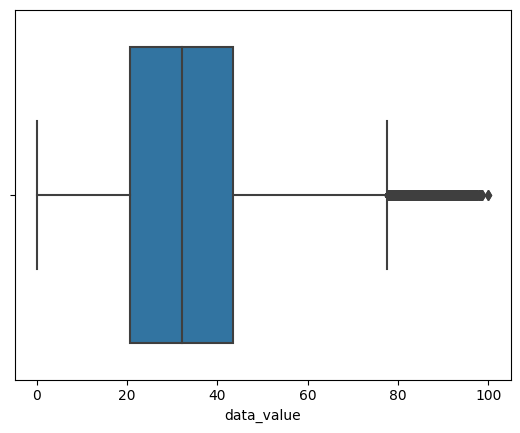

In [40]:
sns.boxplot(data=data1, x='data_value')

In [41]:
q1,q3 = np.percentile(data1['data_value'],[25,75])
iqr=q3-q1
lower_fence=q1-1.5*(iqr)
higher_fence=q3+1.5*(iqr)
print (lower_fence, higher_fence)
print((data1['data_value'] <= lower_fence).value_counts())
print((data1['data_value'] >= higher_fence).value_counts())

-13.599999999999994 77.6
data_value
False    35004
Name: count, dtype: int64
data_value
False    31411
True      3593
Name: count, dtype: int64


In [42]:
low_outliers = data1['data_value'] < lower_fence
high_outliers = data1['data_value'] > higher_fence
outliers = low_outliers | high_outliers
filtered_data = data1[outliers]
outliers.sum() # có 952 giá trị Outliers

3593

<Axes: xlabel='confidence_limit_low'>

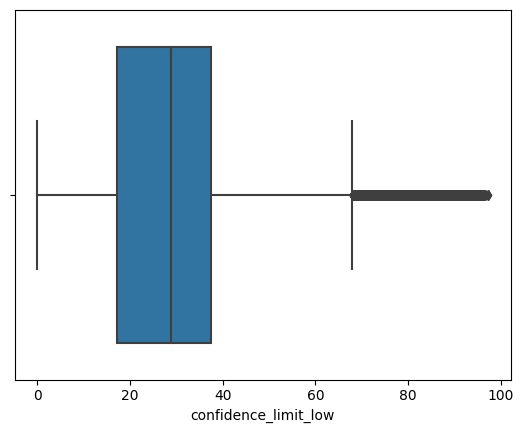

In [43]:
sns.boxplot(data=data1, x='confidence_limit_low')

In [44]:
q1,q3 = np.percentile(data1['confidence_limit_low'],[25,75])
iqr=q3-q1
lower_fence=q1-1.5*(iqr)
higher_fence=q3+1.5*(iqr)
print (lower_fence, higher_fence)
print((data1['confidence_limit_low'] <= lower_fence).value_counts())
print((data1['confidence_limit_low'] >= higher_fence).value_counts())

low_outliers = data1['confidence_limit_low'] < lower_fence
high_outliers = data1['confidence_limit_low'] > higher_fence
outliers = low_outliers | high_outliers
filtered_data = data1[outliers]
outliers.sum() # có 2290 giá trị Outliers

-13.250000000000004 67.95
confidence_limit_low
False    35004
Name: count, dtype: int64
confidence_limit_low
False    30839
True      4165
Name: count, dtype: int64


4165

<Axes: xlabel='year'>

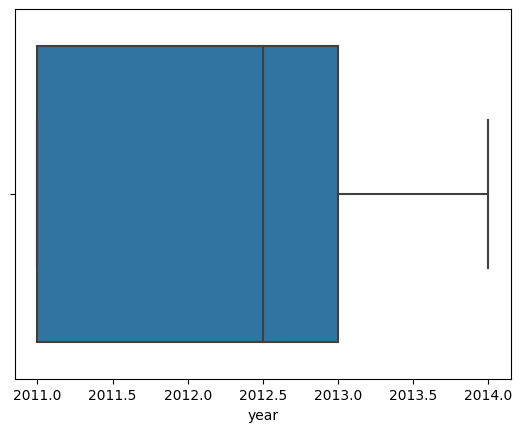

In [45]:
sns.boxplot(data=data1, x='year')

<Axes: xlabel='confidence_limit_high'>

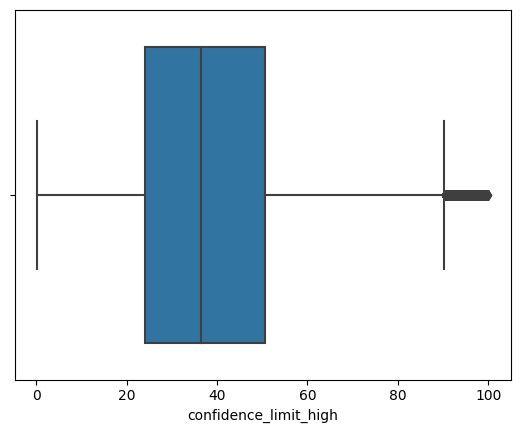

In [46]:
sns.boxplot(data=data1, x='confidence_limit_high')

In [47]:
q1,q3 = np.percentile(data1['confidence_limit_high'],[25,75])
iqr=q3-q1
lower_fence=q1-1.5*(iqr)
higher_fence=q3+1.5*(iqr)
print (lower_fence, higher_fence)
print((data1['confidence_limit_high'] <= lower_fence).value_counts())
print((data1['confidence_limit_high'] >= higher_fence).value_counts())

low_outliers = data1['confidence_limit_high'] < lower_fence
high_outliers = data1['confidence_limit_high'] > higher_fence
outliers = low_outliers | high_outliers
filtered_data = data1[outliers]
outliers.sum() # 0 giá trị Outliers

-15.649999999999999 90.35
confidence_limit_high
False    35004
Name: count, dtype: int64
confidence_limit_high
False    33628
True      1376
Name: count, dtype: int64


1376

<Axes: >

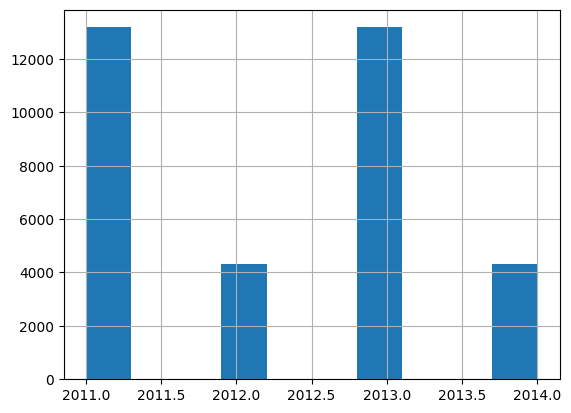

In [48]:
data1.year.hist()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='year', ylabel='Count'>

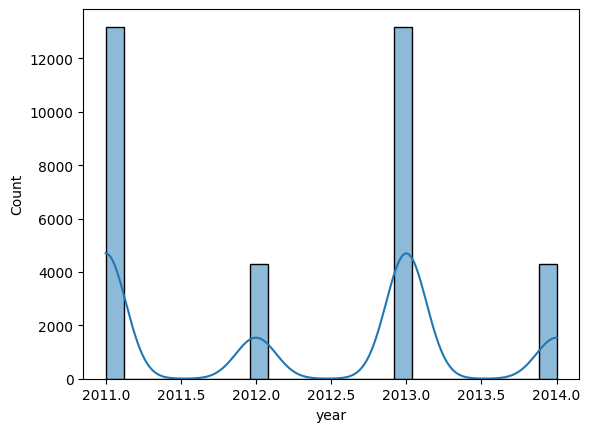

In [49]:
sns.histplot(data1['year'], kde = True)

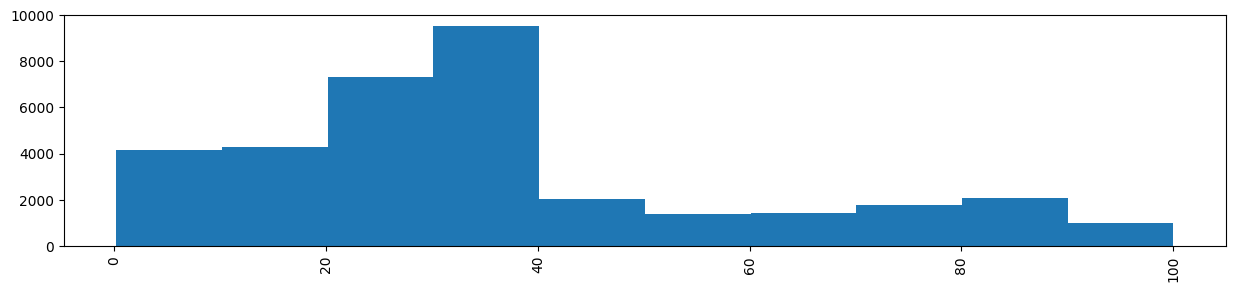

In [50]:
fig = plt.figure(figsize=(15, 3))
plt.hist(data1['data_value'])
plt.xticks(rotation = 90)
plt.rcParams["figure.figsize"] = [6.4, 4.8]
plt.show()

In [51]:
# chỉ tìm outliers chứ không xử lý 